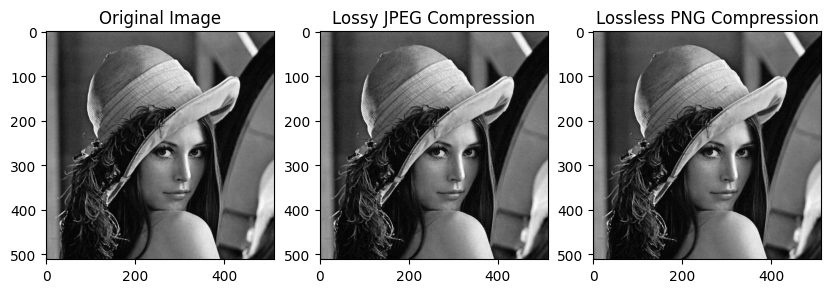

Original Image Size: 63.20 KB
JPEG Compressed Size: 26.28 KB
PNG Compressed Size: 213.90 KB


In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/Picture1.jpg"  # Replace with your actual image path
image = cv2.imread(image_path)

# Convert to RGB (OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

# Save with lossy JPEG compression (quality = 50)
jpeg_path = "compressed_image.jpg"
cv2.imwrite(jpeg_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 50])
compressed_jpeg = Image.open(jpeg_path)

# Save with lossless PNG compression
png_path = "compressed_image.png"
cv2.imwrite(png_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
compressed_png = Image.open(png_path)

# Display compressed images
plt.subplot(1, 3, 2)
plt.imshow(compressed_jpeg)
plt.title("Lossy JPEG Compression")

plt.subplot(1, 3, 3)
plt.imshow(compressed_png)
plt.title("Lossless PNG Compression")

plt.show()

# Print file sizes
import os
print(f"Original Image Size: {os.path.getsize(image_path) / 1024:.2f} KB")
print(f"JPEG Compressed Size: {os.path.getsize(jpeg_path) / 1024:.2f} KB")
print(f"PNG Compressed Size: {os.path.getsize(png_path) / 1024:.2f} KB")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8804 - loss: 0.4140 - val_accuracy: 0.9819 - val_loss: 0.0577
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9825 - loss: 0.0568 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9881 - val_loss: 0.0402
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9874 - val_loss: 0.0434
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9859 - val_loss: 0.0507
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.0142 - val_accuracy: 0.9872 - val_loss: 0.0482
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9959 - loss: 0.0117 - val_accuracy: 0.9894 - val_loss: 0.0406
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0

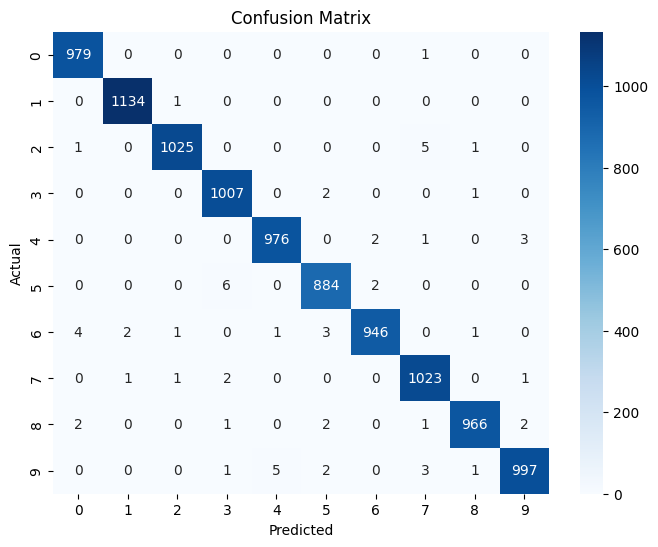

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



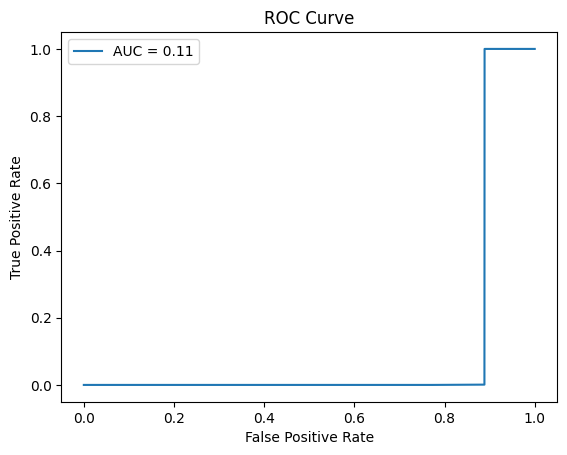

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions (CNN requires 3D input)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3185 - loss: 1.8500 - val_accuracy: 0.5069 - val_loss: 1.3742
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5276 - loss: 1.3090 - val_accuracy: 0.5676 - val_loss: 1.2042
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6116 - loss: 1.1069 - val_accuracy: 0.6237 - val_loss: 1.0787
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6585 - loss: 0.9682 - val_accuracy: 0.6546 - val_loss: 0.9868
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6923 - loss: 0.8852 - val_accuracy: 0.6735 - val_loss: 0.9513
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7190 - loss: 0.8100 - val_accuracy: 0.6819 - val_loss: 0.9257
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7412 - loss: 0.7386 - val_accuracy: 0.6883 - val_loss: 0.9187
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7600 - loss: 0.6833 - val_accuracy: 0.

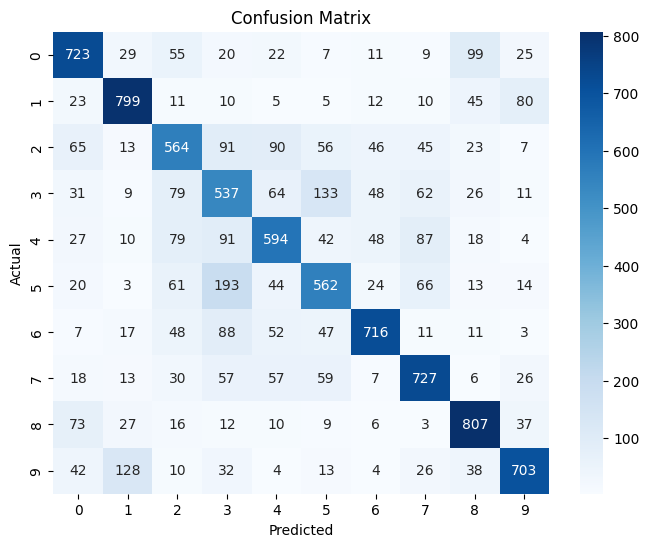

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.76      0.80      0.78      1000
           2       0.59      0.56      0.58      1000
           3       0.47      0.54      0.50      1000
           4       0.63      0.59      0.61      1000
           5       0.60      0.56      0.58      1000
           6       0.78      0.72      0.75      1000
           7       0.70      0.73      0.71      1000
           8       0.74      0.81      0.77      1000
           9       0.77      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



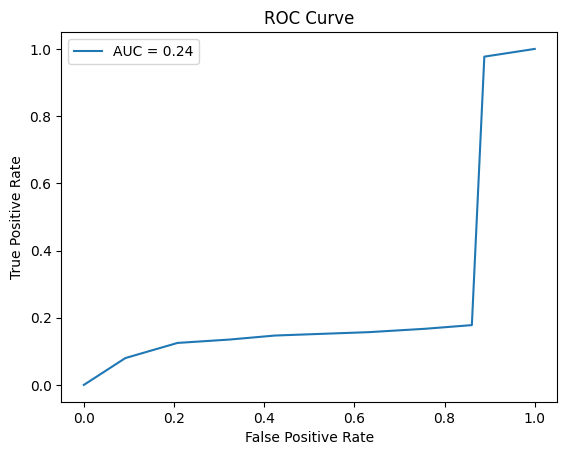

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))

# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test.flatten(), y_pred_classes, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
